In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\IMDbMoviesIndia.csv", encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.shape

(15509, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
# drop records with missing value in any of the following columns: Name, Year, Duration, Votes, Rating
df.dropna(subset=['Name', 'Year', 'Duration', 'Votes', 'Rating'], inplace=True)

In [7]:
df.isnull().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [8]:
# Drop the rows with duplicate movie records
df.drop_duplicates(subset=['Name', 'Year', 'Director'], keep='first', inplace=True)

In [9]:
# Remove values from the Year column values and change the datatype to integer
df['Year'] = df['Year'].str.strip('()').astype(int)

In [10]:
# Remove minutes value from the Duration column values
df['Duration'] = df['Duration'].str.replace(r' min', '').astype(int)

In [11]:
# Remove commas from Votes column and convert to integer
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5850 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5850 non-null   object 
 1   Year      5850 non-null   int32  
 2   Duration  5850 non-null   int32  
 3   Genre     5819 non-null   object 
 4   Rating    5850 non-null   float64
 5   Votes     5850 non-null   int32  
 6   Director  5849 non-null   object 
 7   Actor 1   5775 non-null   object 
 8   Actor 2   5733 non-null   object 
 9   Actor 3   5687 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 434.2+ KB


In [13]:
# Group the data by Year and count the number of movies in each year
yearly_movie_counts = df['Year'].value_counts().sort_index()

Text(0.5, 1.0, 'Number of Movies Released Each Year')

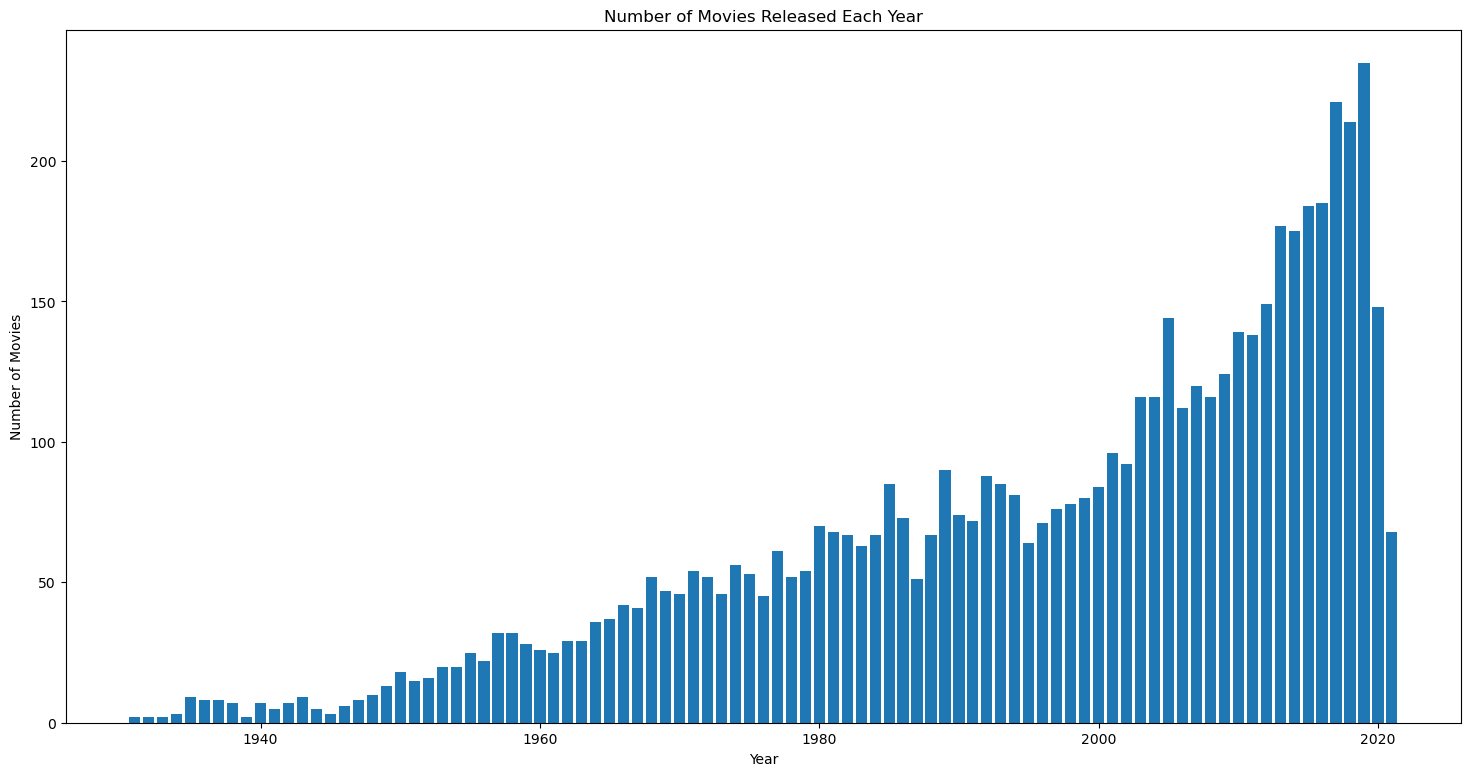

In [14]:
plt.figure(figsize=(18, 9))
plt.bar(yearly_movie_counts.index, yearly_movie_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')

In [15]:
# Create dummy columns for each genre
dummies = df['Genre'].str.get_dummies(', ')
# Creating a new dataframe which combines df and dummies
df_genre = pd.concat([df, dummies], axis=1)

In [16]:
genre_columns = df_genre.columns[10:]  

Text(0.5, 1.0, 'Number of Movies Released Per Genre')

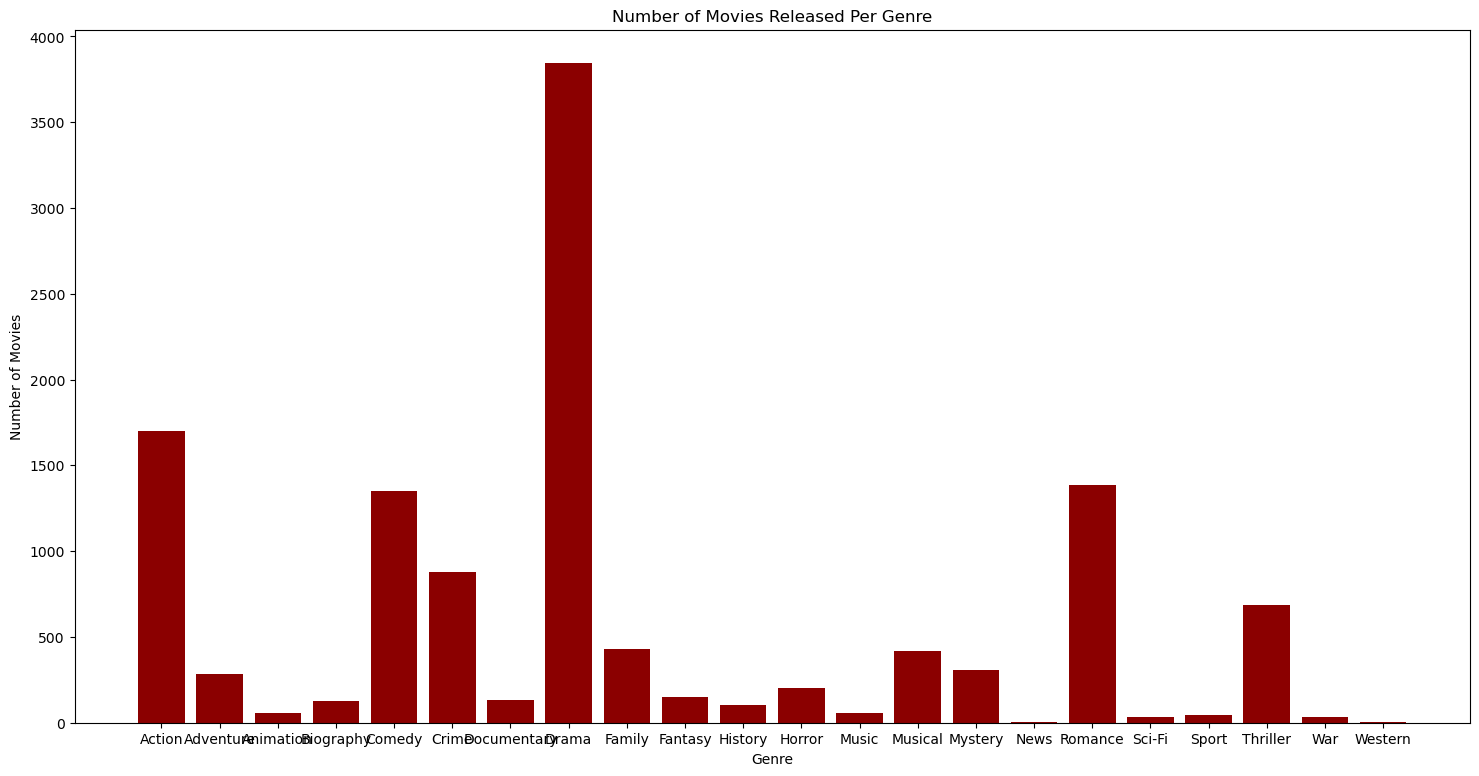

In [17]:
# Group the data by genre_columns and count the number of movies in each genre
genre_movie_counts = df_genre[genre_columns].sum().sort_index()
plt.figure(figsize=(18, 9))
plt.bar(genre_movie_counts.index, genre_movie_counts.values, color='darkred')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Per Genre')

In [18]:
director_movie_counts = df['Director'].value_counts() 

Text(0.5, 1.0, 'Top 20 Directors with the Most Movies')

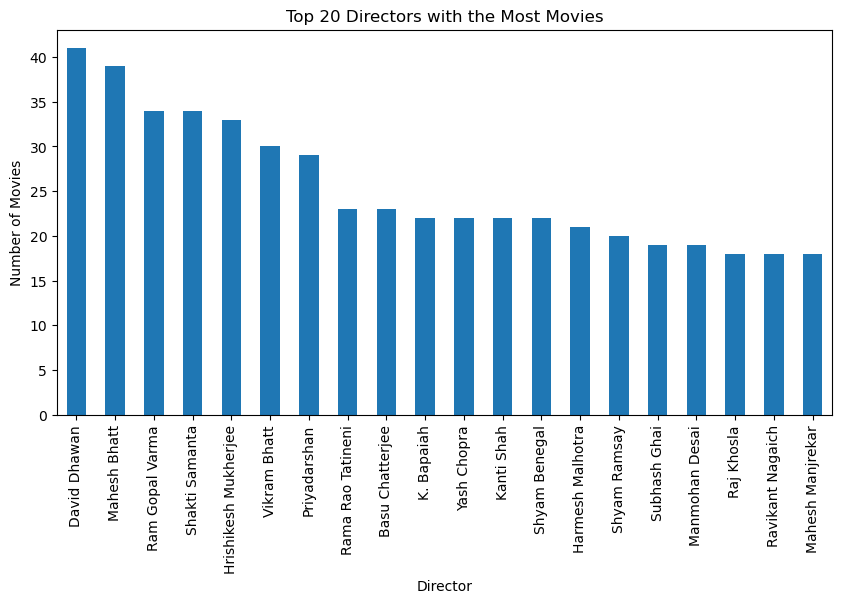

In [19]:
plt.figure(figsize=(10, 5))
bar = director_movie_counts.head(20).plot(kind='bar')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 20 Directors with the Most Movies')

In [20]:
actor_movie_counts = df['Actor 1'].value_counts()

Text(0.5, 1.0, 'Top 20 Actors with the Most Movies')

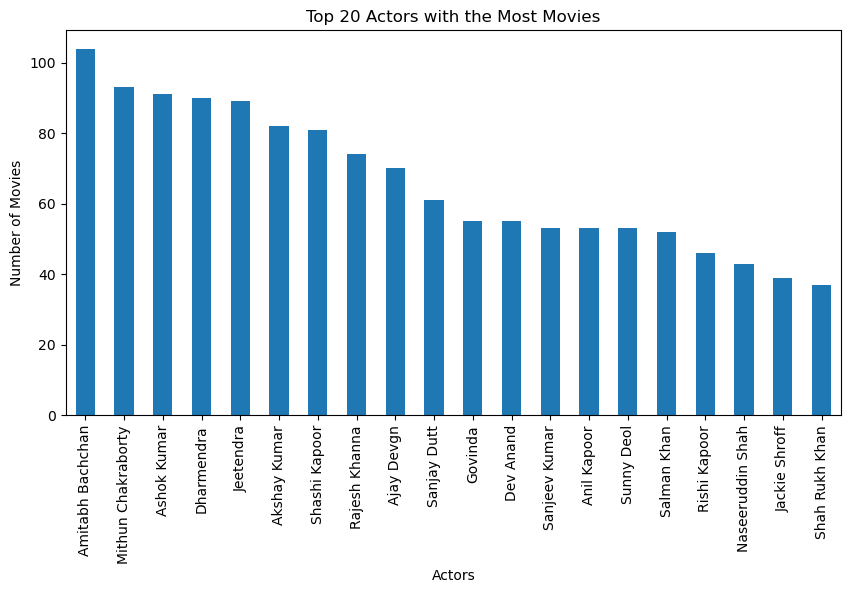

In [21]:
plt.figure(figsize=(10, 5))
actor_movie_counts.head(20).plot(kind='bar')
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.title('Top 20 Actors with the Most Movies')

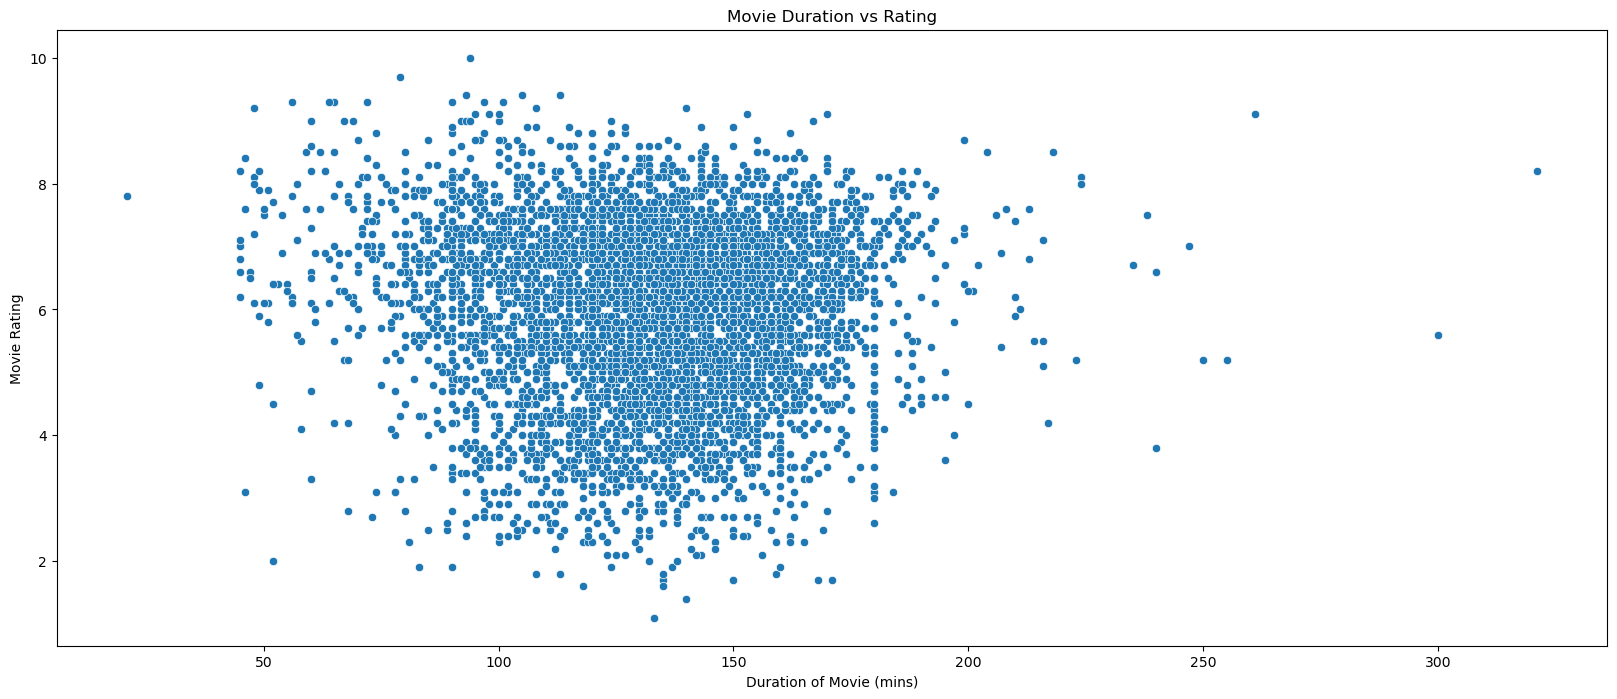

In [22]:
# Movie Duration vs. Rating Scatter Plot
plt.figure(figsize=(20, 8))
sns.scatterplot(x=df['Duration'], y=df['Rating'])
plt.xlabel('Duration of Movie (mins)')
plt.ylabel('Movie Rating')
plt.title('Movie Duration vs Rating')
plt.show()

In [23]:
# Feature Engineering
# Dropping the columns from the dataframe since these are the least dependable observations for target variable 'Rating'
df.drop(['Name','Director','Actor 1','Actor 2','Actor 3'], axis=1,inplace=True)
df.head()

,Year,Duration,Genre,Rating,Votes
1,2019,109,Drama,7.0,8
3,2019,110,"Comedy, Romance",4.4,35
5,1997,147,"Comedy, Drama, Musical",4.7,827
6,2005,142,"Drama, Romance, War",7.4,1086
8,2012,82,"Horror, Mystery, Thriller",5.6,326


In [24]:
X = df[['Year','Duration','Votes']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=231)

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
pred = lr.predict(X_test)

In [28]:
r2_score(y_test,pred)

0.008207910636602977

In [29]:
kRange = range(1,40,1)
scores_list = []

for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    regressor_knn.fit(X_train,y_train)
    pred = regressor_knn.predict(X_test)
    scores_list.append(r2_score(y_test,pred))

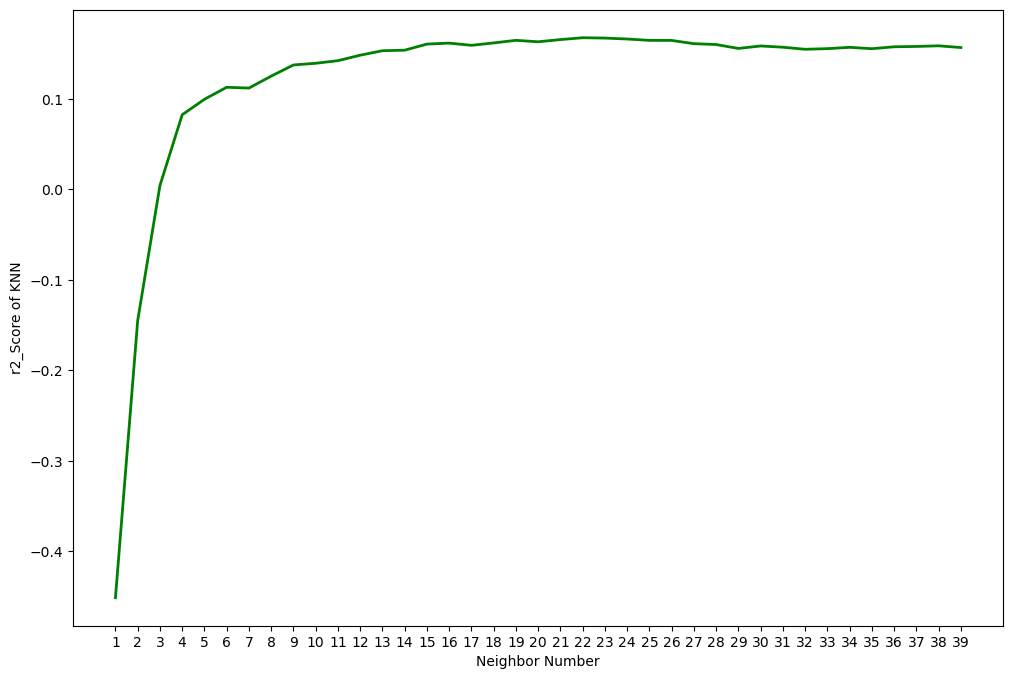

In [30]:
plt.figure(figsize=(12,8))
plt.plot(kRange, scores_list, linewidth=2, color='green')
plt.xticks(kRange)
plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show() 

In [31]:
# Creating a KNN model with best parameters i.e., number of neighbors = 23
regressor_knn = KNeighborsRegressor(n_neighbors = 23)
regressor_knn.fit(X_train,y_train)
pred = regressor_knn.predict(X_test)
r2_score(y_test,pred)

0.1671395485567947

In [32]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

sgd_regressor = SGDRegressor(max_iter=100, random_state=1)
sgd_regressor.fit(X_train, y_train)
pred = sgd_regressor.predict(X_test)

r2 = r2_score(y_test, pred)
print("R-squared score:", r2)

R-squared score: -5.1300414335615726e+32


In [33]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=1)
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)
r2_rf = r2_score(y_test, rf_pred)
print(f'R-squared score (Random Forest): {r2_rf}')

R-squared score (Random Forest): 0.15387392895286345
